In [257]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('https://raw.githubusercontent.com/ChaithrikaRao/DataChime/master/Bank_Personal_Loan_Modelling.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [258]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

1. 독립변수
- Age: 고객의 나이
- Experience: 고객의 직업 경험 기간
- Income: 고객의 연간 수입
- Family: 고객의 가구수
- CCAvg: 고객의 월평균 신용카드 사용금액
- Education: 고객의 교육 수준(1:Undergrad, 2:Graduate, 3:Advanced/Professional
- Mortgate: 고객의 주택 담보 가치
- Securities Account: 고객의 증권계좌 보유 여부
- CD Account: 고객의 예금증서 보유 여부
- Online: 고객의 온라인 뱅킹 여부
- CreditCard: 고객의 신용카드 발급 여부

2. 종속변수
- Personal Loan(대출 여부): 1(대출), 0(미대출)

In [ ]:
X = df.dropna().drop(['ID','ZIP Code','Personal Loan'], axis=1, inplace=False)
y = df['Personal Loan']
print(X)
print(y)

      Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Securities Account  CD Account  Online  CreditCard  
0                      1           0       0           0  
1                      1           0       0         

In [260]:
# 상관관계 분석 함수
def correlation_analysis(X, y):
    data = X.copy()
    data['target'] = y
    correlation = data.corr()['target'].drop('target')
    return correlation.abs().sort_values(ascending=False)
correlation_results = correlation_analysis(X, y)
correlation_results

Income                0.502462
CCAvg                 0.366889
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities Account    0.021954
Age                   0.007726
Experience            0.007413
Online                0.006278
CreditCard            0.002802
Name: target, dtype: float64

In [261]:
X = df[['Income','CCAvg','CD Account','Mortgage','Education','Family']]

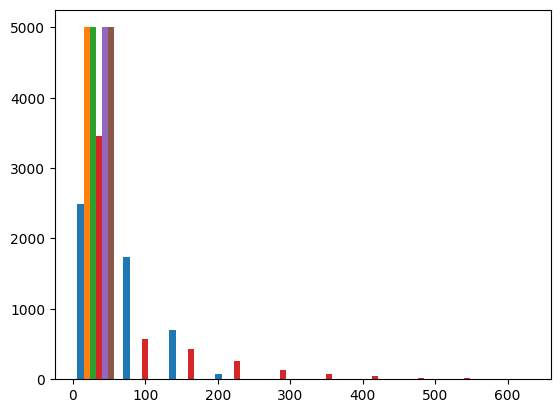

In [262]:
import matplotlib.pyplot as plt
plt.hist(X, bins = 10)
plt.show()

In [263]:
# from sklearn.preprocessing import Normalizer
# # Normalizer: 샘플(행) 단위로 정규화
# Preprocessor = Normalizer()
# X = Preprocessor.fit_transform(X)
# plt.hist(X, bins = 10)
# plt.show()

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 11)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3500, 6) (1500, 6) (3500,) (1500,)


In [265]:
model = KNeighborsClassifier()
training_list = []
acc_list = []
for n in range(1, 26):
    model.set_params(n_neighbors = n)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"==================== [N : {n}] =====================")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(f"==================================================")
    training_list.append(model.score(X_train, y_train))
    acc_list.append(model.score(X_test, y_test))
for i,acc in enumerate(acc_list):
    print(f"[N : {i+1:2d}] Training Accuracy : {training_list[i]}")
    print(f"[N : {i+1:2d}] Test Accuracy : {acc}")
# print(acc_list)

==================== [N : 1] =====================
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1354
           1       0.72      0.58      0.64       146

    accuracy                           0.94      1500
   macro avg       0.84      0.78      0.80      1500
weighted avg       0.93      0.94      0.93      1500

[[1321   33]
 [  62   84]]
==================== [N : 2] =====================
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1354
           1       0.83      0.27      0.41       146

    accuracy                           0.92      1500
   macro avg       0.88      0.63      0.69      1500
weighted avg       0.92      0.92      0.91      1500

[[1346    8]
 [ 106   40]]
==================== [N : 3] =====================
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1354
           1       0.74      0

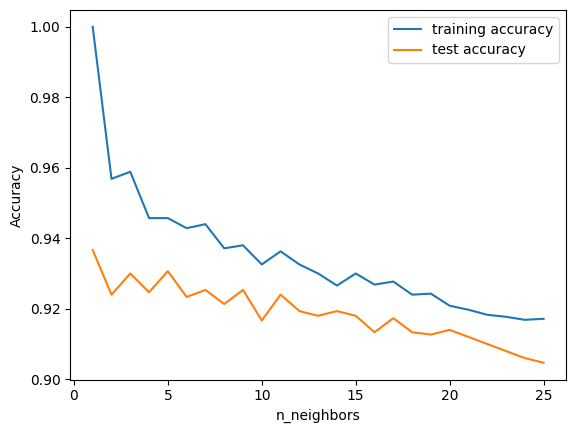

In [266]:
plt.plot(range(1, 26), training_list, label="training accuracy")
plt.plot(range(1, 26), acc_list, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()